In [1]:
# Import
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
import os
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import LinearRegression

In [26]:
df = pd.read_csv('/Users/antoinebertin/Documents/jedha/project/wine_final.csv')
df.head()

,Unnamed: 0,points,price,province,variety,sweet,acidity,body,tannin,abv,...,wound,wrap,year,yellow,young,youthful,zest,zesty,zin,zinfandel
0,0,87,14.0,Oregon,Pinot Gris,1.56,3.5,2.96,1.0,13.02,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,87,27.0,Alsace,Pinot Gris,1.56,3.5,2.96,1.0,13.02,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,88,18.0,California,Pinot Gris,1.56,3.5,2.96,1.0,13.02,...,0.0,0.311638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,88,18.0,New York,Pinot Gris,1.56,3.5,2.96,1.0,13.02,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,90,112.0,Alsace,Pinot Gris,1.56,3.5,2.96,1.0,13.02,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df['relevant_words']

0        ['steel', 'rind', 'ferment', 'dominate', 'pine...
1          ['depth', 'great', 'balanced', 'pear', 'touch']
2        ['straightforward', 'wrap', 'grow', 'variety',...
3               ['nut', 'appeal', 'pair', 'bold', 'smoke']
4        ['honey', 'sweet', 'succulent', 'note', 'beaut...
                               ...                        
64005    ['tannic', 'chocolaty', 'extract', 'hot', 'lack']
64006       ['chunky', 'low', 'raisin', 'prune', 'nuance']
64007    ['pleasing', 'succulent', 'sense', 'elegance',...
64008         ['everyday', 'heavy', 'bake', 'bit', 'feel']
64009         ['citrusy', 'sharp', 'way', 'little', 'bit']
Name: relevant_words, Length: 64010, dtype: object

In [3]:
features_list = ["points", "province", "variety"]
X = df.loc[:,features_list]
y = df.loc[:,"price"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [5]:
X_train.head()

,points,province,variety
64695,84,California,Chardonnay
90552,90,France Other,Rosé
28324,88,New York,Rosé
3724,87,Casablanca Valley,Gewürztraminer
66271,89,Provence,Rosé


In [6]:
#Numeric features and transformer
numeric_features = [0]  
numeric_transformer = StandardScaler()

#Categorical features and transformers
categorical_features = [1, 2] 

categorical_transformer = OneHotEncoder(drop='first')

#ColumnTransformer with mixed types
feature_encoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [7]:
X_train = feature_encoder.fit_transform(X_train)
X_test = feature_encoder.transform(X_test)

In [8]:
rfc = RandomForestRegressor()
#rfc = LinearRegression()
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
rfc.score(X_train, y_train)

0.4616193014947543

In [10]:
rfc.score(X_test, y_test)

0.4457851321315689

# Model perf

In [11]:
y_test_pred = rfc.predict(X_test)

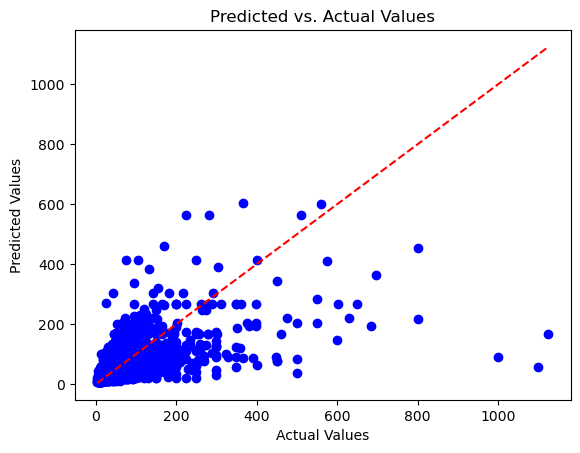

In [12]:
# Assuming you have your actual values 'y_test' and predicted values 'y_pred'
plt.scatter(y_test, y_test_pred, color='blue')
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plotting a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.show()

In [21]:
# Assuming 'regressor.coef_' is a 1D array and the order of coefficients matches 'all_column_names'

# Coefficients for each set of categorical features
province_coef_mean = np.mean(rfc.feature_importances_[:len(feature_encoder.transformers_[1][1].categories_[0])])
variety_coef_mean = np.mean(rfc.feature_importances_[len(feature_encoder.transformers_[1][1].categories_[0]):-1])

# Coefficient for the numerical feature
points_coef = rfc.feature_importances_[-1]

# Create a simplified DataFrame for feature importance
simplified_feature_importance = pd.DataFrame({
    "feature_names": ['province', 'variety', 'points'],
    "aggregated_coefficients": [province_coef_mean, variety_coef_mean, points_coef]
})

#simplified_feature_importance
simplified_feature_importance.sort_values

<bound method DataFrame.sort_values of   feature_names  aggregated_coefficients
0      province                 0.013968
1       variety                 0.002547
2        points                 0.000195>

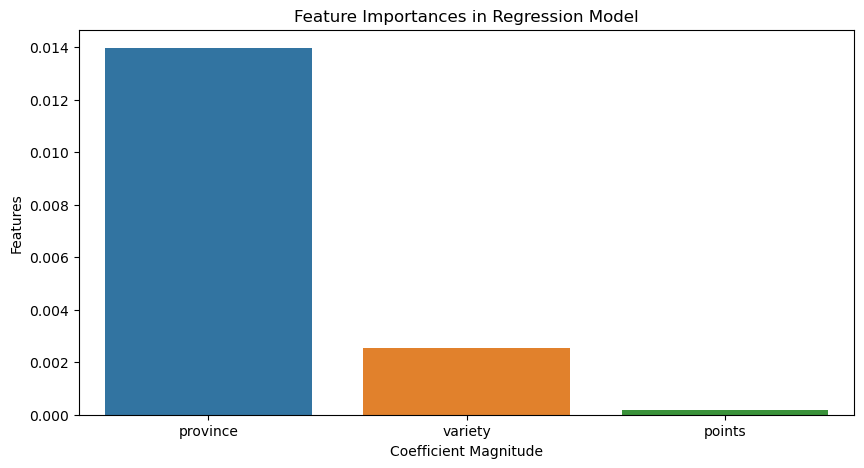

In [22]:
# Assuming feature_importance is your DataFrame from the previous step
plt.figure(figsize=(10, 5))  # Adjust the size as needed

# Sort the DataFrame by coefficients to see the most important features
feature_importance_sorted = simplified_feature_importance.sort_values(by='aggregated_coefficients', ascending=False)

# Create a barplot
sns.barplot(x='feature_names', y='aggregated_coefficients', data=feature_importance_sorted)

# Highlight the 'points' feature
#plt.axhline(y=feature_importance_sorted.index[feature_importance_sorted['feature_names'] == 'points'][0], color='red', linestyle='--')

plt.title('Feature Importances in Regression Model')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()

# TEST

In [23]:
df.head()

,description,points,price,province,variety
0,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Portuguese Red
1,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Pinot Gris
2,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Pinot Noir
3,This dry and restrained wine offers spice in p...,87,24.0,Alsace,Gewürztraminer
4,Savory dried thyme notes accent sunnier flavor...,87,12.0,Rheinhessen,Gewürztraminer


In [25]:
new_prediction = {
    'points': [87],
    'province': ['Douro'],
    'variety': ['Gewürztraminer']
}

df_new_prediction = pd.DataFrame(new_prediction)
new_prediction = feature_encoder.transform(df_new_prediction)

# Make predictions on the new data
the_prediction = rfc.predict(new_prediction)
print(f"The prediction is: {the_prediction}")

The prediction is: [20.73209094]
